## Tallies

Any tally in OpenMC can be described with the following form:

$$ 
 X = \underbrace{\int d\mathbf{r} \int d\mathbf{\Omega} \int
    dE}_{\text{filters}} \underbrace{f(\mathbf{r}, \mathbf{\Omega},
    E)}_{\text{scores}} \psi (\mathbf{r}, \mathbf{\Omega}, E)
$$

where filters set the limits of the integrals and the scoring function is convolved with particle information (e.g. reaction type, current material, etc.).

In [1]:
import openmc
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
openmc.examples.pwr

In [2]:
pincell_model = openmc.examples.pwr_pin_cell()

In [3]:
pincell_model

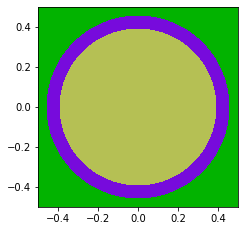

In [4]:
pincell_model.geometry.root_universe.plot()

In [6]:
material_dict = pincell_model.geometry.get_all_materials()

In [7]:
material_dict[1]

Material
	ID             =	1
	Name           =	UO2 (2.4%)
	Temperature    =	None
	Density        =	10.29769 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	U234           =	4.4843e-06   [ao]
	U235           =	0.00055815   [ao]
	U238           =	0.022408     [ao]
	O16            =	0.045829     [ao]

In [8]:
material_dict

OrderedDict([(1,
              Material
              	ID             =	1
              	Name           =	UO2 (2.4%)
              	Temperature    =	None
              	Density        =	10.29769 [g/cm3]
              	S(a,b) Tables  
              	Nuclides       
              	U234           =	4.4843e-06   [ao]
              	U235           =	0.00055815   [ao]
              	U238           =	0.022408     [ao]
              	O16            =	0.045829     [ao]),
             (2,
              Material
              	ID             =	2
              	Name           =	Zircaloy
              	Temperature    =	None
              	Density        =	6.55 [g/cm3]
              	S(a,b) Tables  
              	Nuclides       
              	Zr90           =	0.021827     [ao]
              	Zr91           =	0.00476      [ao]
              	Zr92           =	0.0072758    [ao]
              	Zr94           =	0.0073734    [ao]
              	Zr96           =	0.0011879    [ao]),
             (3,
     

In [9]:
pincell_model.tallies

[]

## Computing Eenergy Released per Fission

In [10]:
fission_tally = openmc.Tally(name='fission tally')

In [11]:
fission_tally

Tally
	ID             =	1
	Name           =	fission tally
	Filters        =	
	Nuclides       =	
	Scores         =	[]
	Estimator      =	None

In [12]:
fission_tally.scores = ['fission', 'kappa-fission', 'heating-local']
fission_tally

Tally
	ID             =	1
	Name           =	fission tally
	Filters        =	
	Nuclides       =	
	Scores         =	['fission', 'kappa-fission', 'heating-local']
	Estimator      =	None

In [13]:
tallies = openmc.Tallies([fission_tally])

In [14]:
pincell_model.tallies = tallies

In [15]:
pincell_model.settings.batches = 50
pincell_model.settings.inactive = 10
pincell_model.settings.particles = 5000


In [16]:
sp_filename = pincell_model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [17]:
sp_filename

PosixPath('/home/ubuntu/notebooks/notebooks/statepoint.50.h5')

In [18]:
!ls

Session1.ipynb	materials.xml  statepoint.20.h5  tallies.out
Session2.ipynb	plots.xml      statepoint.50.h5  tallies.xml
geometry.xml	settings.xml   summary.h5


In [19]:
!cat tallies.out

 ====================>     TALLY 1: FISSION TALLY     <=====================

 Total Material
   Fission Rate                         0.471285 +/- 0.0014699
   Kappa-Fission Rate                   9.1276e+07 +/- 284296
   heating-local                        9.39275e+07 +/- 284145


In [20]:
statepoint = openmc.StatePoint(sp_filename)

In [26]:
statepoint.tallies

{1: Tally
 	ID             =	1
 	Name           =	fission tally
 	Filters        =	
 	Nuclides       =	total
 	Scores         =	['fission', 'kappa-fission', 'heating-local']
 	Estimator      =	tracklength}

In [27]:
fission_tally

Tally
	ID             =	1
	Name           =	fission tally
	Filters        =	
	Nuclides       =	
	Scores         =	['fission', 'kappa-fission', 'heating-local']
	Estimator      =	None

In [28]:
tally_out = statepoint.get_tally(name='fission tally')

In [29]:
tally_out

Tally
	ID             =	1
	Name           =	fission tally
	Filters        =	
	Nuclides       =	total
	Scores         =	['fission', 'kappa-fission', 'heating-local']
	Estimator      =	tracklength

In [30]:
tally_out.mean

array([[[4.71284608e-01, 9.12760460e+07, 9.39274939e+07]]])

In [31]:
tally_out.std_dev

array([[[1.46989862e-03, 2.84296496e+05, 2.84144703e+05]]])

In [32]:
fission_rate = tally_out.get_values(scores=['fission'])

In [35]:
fission_rate = fission_rate.flat[0]

In [36]:
fission_rate

0.4712846083611536

In [37]:
kappa_fission = tally_out.get_values(scores=['kappa-fission']).flat[0]


In [38]:
kappa_fission

91276046.02485184

In [39]:
heating_local = tally_out.get_values(scores=['heating-local']).flat[0]

In [40]:
heating_local

93927493.88583496

In [43]:
# fission rate - rate / source-particle 
# energy dep. - eV / source-particle
ev_per_fission = heating_local / fission_rate
mev_per_fission = ev_per_fission * 1e-6
print("MeV per fission: {:.3f}".format(mev_per_fission))

MeV per fission: 199.301


In [44]:
df = tally_out.get_pandas_dataframe()

In [47]:
df

nuclide          score     mean  std. dev.
0   total        fission 4.71e-01   1.47e-03
1   total  kappa-fission 9.13e+07   2.84e+05
2   total  heating-local 9.39e+07   2.84e+05

<div class="alert alert-block alert-info">
<b>A quick aside on how statepoint objects interact with summary files:</b>


The `openmc.statepoint` object will read information from the `summary.h5` file if one is present, keeping that file open in the Python interpreter. The open `summary.h5` file can interfere with the initialization of subsequent OpenMC simulations. It is recommended that information be extracted from statepoints within a [context manager](https://book.pythontips.com/en/latest/context_managers.html) as we do here. Alternatively, making sure to call the `openmc.StatePoint.close` method will work also. For more details please look to the [relevant section in the user's guide](https://docs.openmc.org/en/stable/usersguide/troubleshoot.html#runtimeerror-failed-to-open-hdf5-file-with-mode-w-summary-h5).   
</div>

In [49]:
statepoint.close()

In [50]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [51]:
# equivalent to `statepoint = openmc.StatePoint(sp_filename)`
with openmc.StatePoint(sp_filename) as statepoint:
    # run some code
    print(statepoint.keff)

1.1627+/-0.0017


In [52]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

## Plotting the Neutron Spectrum

In [54]:
energy_filter = openmc.EnergyFilter.from_group_structure('CASMO-70')
len(energy_filter.bins)

70

In [55]:
spectrum_tally = openmc.Tally()
spectrum_tally.filters = [energy_filter]
spectrum_tally.scores = ['flux']
print(spectrum_tally)

Tally
	ID             =	2
	Name           =	
	Filters        =	EnergyFilter
	Nuclides       =	
	Scores         =	['flux']
	Estimator      =	None


In [57]:
pincell_model.tallies = [spectrum_tally]

In [58]:
sp_filename = pincell_model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [59]:
with openmc.StatePoint(sp_filename) as statepoint:
    tally = statepoint.get_tally(id=spectrum_tally.id)

In [60]:
plt.figure(figsize=(16, 9))

bin_boundaries = np.unique(energy_filter.bins).copy()

print(np.min(bin_boundaries))
print(np.max(bin_boundaries))

0.0
20000000.0


<Figure size 1152x648 with 0 Axes>

In [62]:
l = [1, 2, 3, 4, 5]
print(l[2:])
print(l[:-2])

[3, 4, 5]
[1, 2, 3]


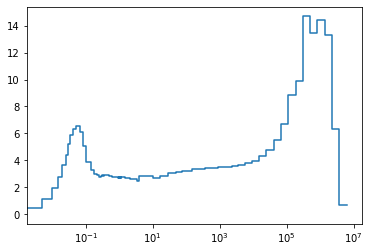

In [64]:
bin_boundaries[0] = 1e-10

log_de = np.log10(bin_boundaries[1:]/bin_boundaries[:-1])

spectrum = tally.mean

plt.step(np.unique(energy_filter.bins)[:-1], spectrum.flatten() / log_de)
plt.xscale('log')
plt.show()

## Normalizing Tallies

The combination of the following tally values and power provide us with the source normalization needed as follows:


$$ \text{neutron source} [\frac{n}{s}] = \text{power} [\frac{J}{s}] \times \frac{1}{1.6\times 10^{-19}} [\frac{eV}{J}] \times \frac{1}{\text{heat per fission} [\frac{eV}{fission}]} \times \text{neutrons per fission} [\frac{n}{fission}]$$ 

## Reaction Types by Material

https://github.com/openmc-dev/openmc-notebooks